In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib # Library for image processing and display
import cv2 # Library for computer vision tasks
import os # Library for interacting with the operating system
import PIL # Library for image processing and display
from collections import Counter # Library for counting the occurrences of elements

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")

**Download and Safe the dataset in a file**

In [2]:
# The'flower_photo' is the name of the folder we create to put images in.
# The 'cache_dir' is the path where we will store the files.
# The untar = true is used to unzip our file.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='User\Desktop\Data Science PAPEI\github\Flower-Classification\Dataset', untar=True)

**Use Pathlib library**

In [3]:
# It shows us where the file is located.
data_dir

'/tmp\\.keras\\datasets\\flower_photos'

In [4]:
# We convert the 'data_dir' like a type of a path object with pathlib.
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('/tmp/.keras/datasets/flower_photos')

In [29]:
# It allows us to perform various tasks, such as providing us with all the jpg images from the file.
list(data_dir.glob('*/*.jpg'))[:10]

[WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [5]:
# Lets see how is the photos we have
image_counts = len(list(data_dir.glob('*/*.jpg')))
image_counts

3670

**If we examine the file it will display the types of flowers we have.**

![](Screenshot_1.jpg)

In [6]:
# Lets count all the flowers by type.
daisy = list(data_dir.glob('daisy/*'))
dandelion = list(data_dir.glob('dandelion/*'))
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))

len(daisy), len(dandelion), len(roses), len(sunflowers), len(tulips)

(633, 898, 641, 699, 799)

In [7]:
daisy[:5]

[WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('/tmp/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

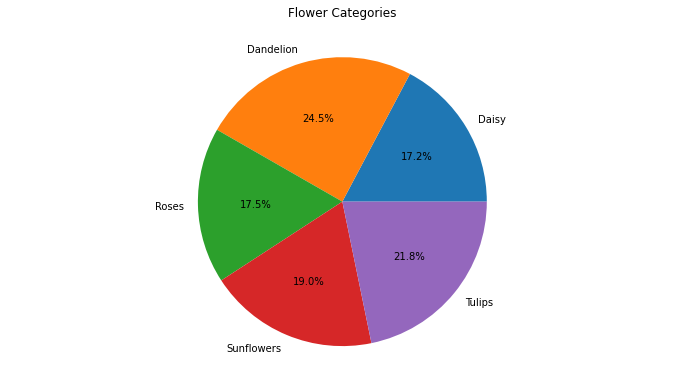

In [8]:
# Plot the ratios.
types = ['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips']
lengths = [len(daisy), len(dandelion), len(roses), len(sunflowers), len(tulips)]

plt.figure(figsize=(12,6))
plt.pie(lengths, labels=types, autopct='%1.1f%%')
plt.title('Flower Categories\n')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()


**Use PIL library to Visualize the photos**

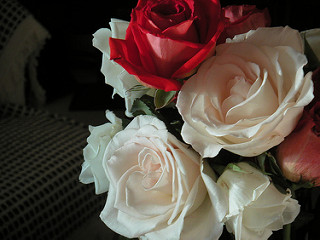

In [10]:
# Lets see a photo of a rose.
PIL.Image.open(str(roses[1]))

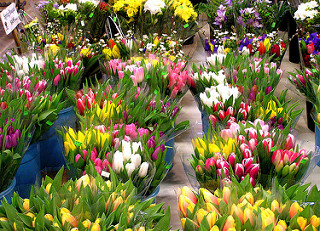

In [11]:
PIL.Image.open(str(tulips[7]))

**Use cv2 lirary to Prepare our Data**

**We will create classes for our data in the form of dictionaries and the paths of the images associated with them.**

In [12]:
flowers_images_dict = {
    'daisy': daisy,
    'dandelion': dandelion,
    'roses': roses,
    'sunflowers': sunflowers,
    'tulips': tulips,
}

# Also we assign a number to each of our classes.
flowers_labels_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,
}

print(flowers_images_dict['roses'][0])

\tmp\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


In [13]:
# We use cv2 to be able to read the following file as an OpenCV object in the form of a numpy array.
# In order to view the first image as an array, we need to convert its path to a string format.
img = cv2.imread(str(flowers_images_dict['roses'][0]))
print('We created a 3x3 numpy array with RGB values\n', img)

We created a 3x3 numpy array with RGB values
 [[[ 0 15  6]
  [ 0 15  6]
  [ 0 17  8]
  ...
  [24 51 31]
  [25 52 32]
  [26 53 33]]

 [[ 7 22 14]
  [ 7 22 14]
  [ 6 21 13]
  ...
  [20 46 30]
  [23 49 33]
  [25 51 35]]

 [[12 23 15]
  [12 23 15]
  [11 22 14]
  ...
  [20 42 30]
  [23 45 33]
  [26 48 36]]

 ...

 [[19 30 27]
  [14 24 18]
  [12 20 13]
  ...
  [ 4 13  3]
  [ 0  8  1]
  [ 0  5  0]]

 [[19 30 28]
  [18 27 24]
  [15 23 16]
  ...
  [ 3 12  2]
  [ 1  9  2]
  [ 0  7  2]]

 [[ 9 19 19]
  [17 25 24]
  [22 29 24]
  ...
  [ 1 12  2]
  [ 2 10  3]
  [ 3 11  4]]]


In [14]:
img.shape

(240, 179, 3)

**If we dont convert 'flowers_images_dict' to str we have this error**

![](Screenshot_2.jpg)

In [15]:
# Also with cv2 we can resize the data.
print('The first shape of image: ',img.shape)
print('After we resize the image the shape is: ',cv2.resize(img,(180,180)).shape)

The first shape of image:  (240, 179, 3)
After we resize the image the shape is:  (180, 180, 3)


In [16]:
# Because all the images have different dimensions, we will rezise them using the help of the cv2 library.
X = []
y = []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
# Calculate the value counts of elements in the list y
# This elements is the label foreach flower
y_counts = Counter(y)
y_counts

Counter({0: 633, 1: 898, 2: 641, 3: 699, 4: 799})

**Train and Test Split**

In [18]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3), (2752,), (918,))

In [19]:
# Preprocessing: Scaling the images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [20]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [21]:
X_test_scaled.min(), X_test_scaled.max()

(0.0, 1.0)

In [22]:
X_train_scaled[0]

array([[[0.37647059, 0.39215686, 0.50588235],
        [0.37647059, 0.39215686, 0.50196078],
        [0.38431373, 0.40392157, 0.50196078],
        ...,
        [0.21568627, 0.23529412, 0.33333333],
        [0.22352941, 0.23137255, 0.3254902 ],
        [0.22745098, 0.23137255, 0.31372549]],

       [[0.38431373, 0.4       , 0.50980392],
        [0.38823529, 0.40784314, 0.50980392],
        [0.39215686, 0.41568627, 0.50980392],
        ...,
        [0.22745098, 0.24313725, 0.34117647],
        [0.23137255, 0.23921569, 0.3372549 ],
        [0.23529412, 0.23529412, 0.33333333]],

       [[0.39215686, 0.41176471, 0.50980392],
        [0.39215686, 0.41176471, 0.50980392],
        [0.39607843, 0.41960784, 0.50980392],
        ...,
        [0.25098039, 0.25882353, 0.35294118],
        [0.24705882, 0.25098039, 0.35294118],
        [0.25098039, 0.24705882, 0.35686275]],

       ...,

       [[0.4745098 , 0.45882353, 0.56470588],
        [0.33333333, 0.32156863, 0.42352941],
        [0.38431373, 0

**Create the Model | Convolutional**

In [23]:
num_classes = 5 # Because we have 5 categories of flowers, this will also be the output in our final stream from the ANN.

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'), # # Applying padding = 'same' to ensure that all points in the image are weighted.
  layers.MaxPooling2D(), # Max pooling reduces the spatial dimensions of the input, retaining the most important features.
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(), # Flattening the output to a 1D vector to prepare it for the dense layers | ANN.
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# The 'from_logits=True' parameter indicates that the model's output is in raw unnormalized values called logits.
# Logits are not directly interpretable as probabilities and need to be converted.
# The loss function internally applies a softmax function to the logits, which transforms them into probabilities before calculating the cross-entropy loss.
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 63s 690ms/step - loss: 1.4009 - accuracy: 0.4161
Epoch 2/10
86/86 [==============================] - 53s 621ms/step - loss: 1.0610 - accuracy: 0.5865
Epoch 3/10
86/86 [==============================] - 54s 622ms/step - loss: 0.8591 - accuracy: 0.6624
Epoch 4/10
86/86 [==============================] - 54s 623ms/step - loss: 0.6422 - accuracy: 0.7536
Epoch 5/10
86/86 [==============================] - 52s 605ms/step - loss: 0.4073 - accuracy: 0.8557
Epoch 6/10
86/86 [==============================] - 54s 632ms/step - loss: 0.2357 - accuracy: 0.9259
Epoch 7/10
86/86 [==============================] - 50s 578ms/step - loss: 0.1581 - accuracy: 0.9484
Epoch 8/10
86/86 [==============================] - 49s 571ms/step - loss: 0.1017 - accuracy: 0.9735
Epoch 9/10
86/86 [==============================] - 50s 577ms/step - loss: 0.0511 - accuracy: 0.9876
Epoch 10/10
86/86 [==============================] - 49s 572ms/step - loss: 0.0275 - accura

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 160ms/step - loss: 2.0363 - accuracy: 0.6111


[2.036346197128296, 0.6111111044883728]

**We observe that we do not have good accuracy, which happens due to overfitting and we observe the overfitting better in the big different between the training and validation loss.**

**Emprove Test Accuracy through Data Augmentation:**<br>
**To combat overfitting, we will leverage data augmentation techniques. Specifically, we will generate additional images with rotations such as zooming in or flipping, thereby introducing greater diversity to the dataset and improving  our AI model.**

In [27]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
 [
    # Randomly flips the input images horizontally, providing additional variations in the dataset.
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                            input_shape=(img_height, 
                                                          img_width,
                                                          3)),

    # Applies random rotations within the range of -0.1 to 0.1 radians.
    layers.experimental.preprocessing.RandomRotation(0.1),

    # Randomly zooms input images between the scale of 0.9 and 1.1.
    layers.experimental.preprocessing.RandomZoom(0.1),

    # Randomly adjusts the contrast of input images within a range of -0.2 to 0.2.
    layers.experimental.preprocessing.RandomContrast(0.2),
  ]
)

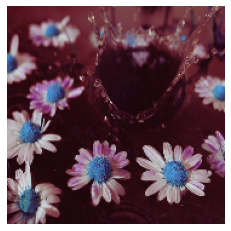

In [28]:
# Lets see an example of a data augmentation.
plt.axis('off')
plt.imshow(X[3])

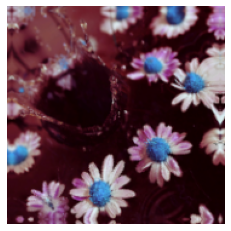

In [29]:
# We see the photo changed.
plt.axis('off')
plt.imshow(data_augmentation(X)[3].numpy().astype("uint8"))

In [30]:
# Train the model using data augmentation and a drop out layer to avoid  the overfitting.
# We have exactly the same model, except that we have added data augmentation in the first step, where the same first step performs augmentation by generating new samples.
# We have also added a Dropout layer to achieve better generalization during training.
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 [==============================] - 75s 781ms/step - loss: 1.3500 - accuracy: 0.4066
Epoch 2/10
86/86 [==============================] - 69s 808ms/step - loss: 1.0761 - accuracy: 0.5640
Epoch 3/10
86/86 [==============================] - 73s 854ms/step - loss: 0.9594 - accuracy: 0.6290
Epoch 4/10
86/86 [==============================] - 65s 761ms/step - loss: 0.8921 - accuracy: 0.6548
Epoch 5/10
86/86 [==============================] - 62s 725ms/step - loss: 0.8102 - accuracy: 0.6908
Epoch 6/10
86/86 [==============================] - 69s 799ms/step - loss: 0.7947 - accuracy: 0.7078
Epoch 7/10
86/86 [==============================] - 65s 755ms/step - loss: 0.7263 - accuracy: 0.7235
Epoch 8/10
86/86 [==============================] - 66s 771ms/step - loss: 0.7013 - accuracy: 0.7300
Epoch 9/10
86/86 [==============================] - 69s 805ms/step - loss: 0.6390 - accuracy: 0.7620
Epoch 10/10
86/86 [==============================] - 70s 810ms/step - loss: 0.6055 - accura

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 156ms/step - loss: 0.7653 - accuracy: 0.7070


[0.7652721405029297, 0.7069717049598694]

**We are facing overfitting again, but not as much as before. This is because we used data augmentation. To  reduce more the overfitting, we can also use additional techniques of data augmentation (like RandomBrightness, Grayscale), but we didn't have many computational resources to do it.**<br><br>
**More techniques of data augmentation: https://www.datacamp.com/tutorial/complete-guide-data-augmentation**

**Test the first 15 predictions of the model**

In [32]:
# Generate predictions for all samples in X_test_scaled using the trained model.
predictions = model.predict(X_test_scaled)

29/29 [==============================] - 5s 152ms/step


In [33]:
# Take the first prediction from the predictions array
# We observed the first prediction it gives more possibilities to the second calss which is dandelion with label 1
first_prediction = predictions[0]
first_prediction

array([ 0.31176364,  3.653319  ,  0.03154071, -1.5926616 , -0.25921547],
      dtype=float32)

In [34]:
# Convert prediction scores into probabilities using softmax function
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.0325388 , 0.9196456 , 0.02458681, 0.0048453 , 0.01838351],
      dtype=float32)>

In [35]:
# Find the index of the highest probability in the score array
# We see it returns the label 1 from dandelion
predicted_class_index = np.argmax(score)
predicted_class_index

1

In [36]:
# keep the first 15 preds and actual labels in lists
first15_preds = []
actual = []

for index in range(0,15):
    prediction = predictions[index]
    score = tf.nn.softmax(prediction)
    predicted_class_index = np.argmax(score)
    first15_preds.append(predicted_class_index)
    actual.append(y_test[index])

In [37]:
first15_preds

[1, 1, 2, 4, 2, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1]

In [38]:
actual

[1, 0, 2, 4, 2, 3, 0, 4, 3, 4, 1, 3, 1, 3, 4]

In [40]:
correctPred = 0
wrongPred = 0
for i in first15_preds:

    if first15_preds[i] == actual[i]:
        correctPred += 1
    else:
        wrongPred += 1

print('In the first 15 predictions who made by the Model we have',correctPred,'correct and', wrongPred, 'wrong')


In the first 15 predictions who made by the Model we have 10 correct and 5 wrong
